In [71]:
import GS_data_analysis
import importlib
importlib.reload(GS_data_analysis)

<module 'GS_data_analysis' from '/Users/andreasmorr/Library/Mobile Documents/com~apple~CloudDocs/PhD Studium/Eigene Papers/EstimationLandscape/RedNoiseEstimatorComparison/ClusterCode/GS_data_analysis.py'>

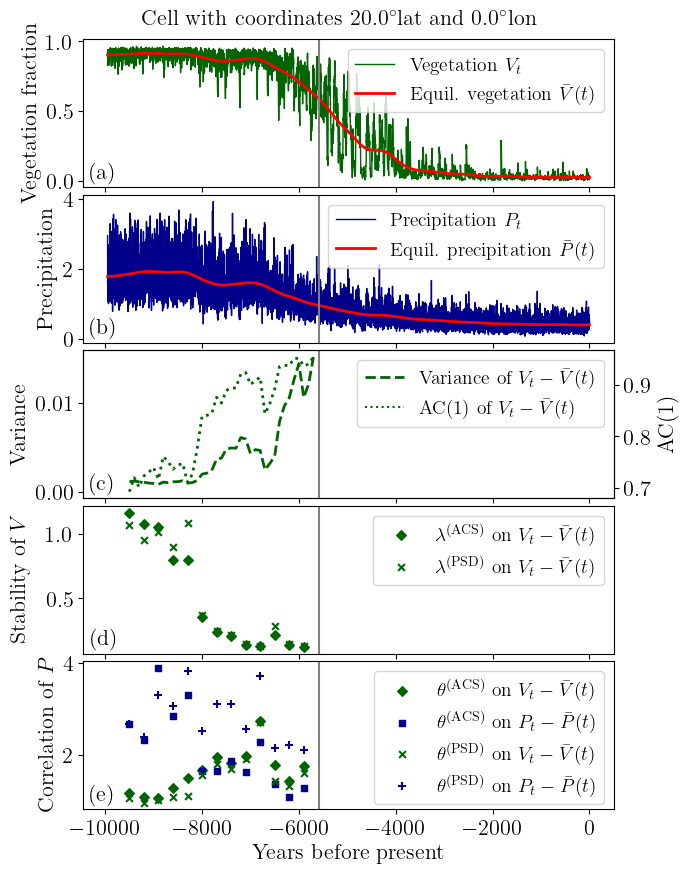

In [72]:
GS_data_analysis.plot_cell("lat28_lon0")

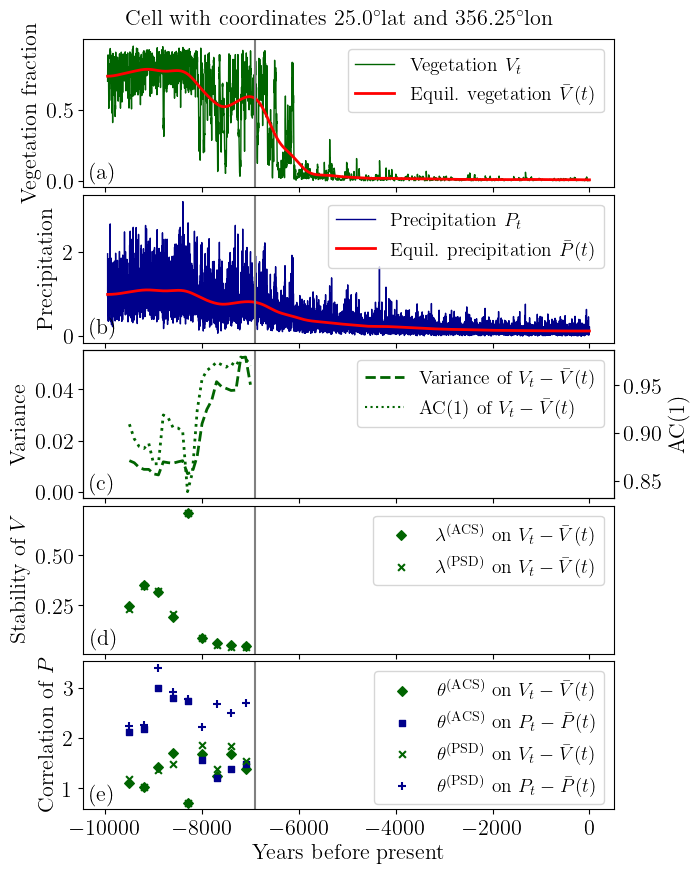

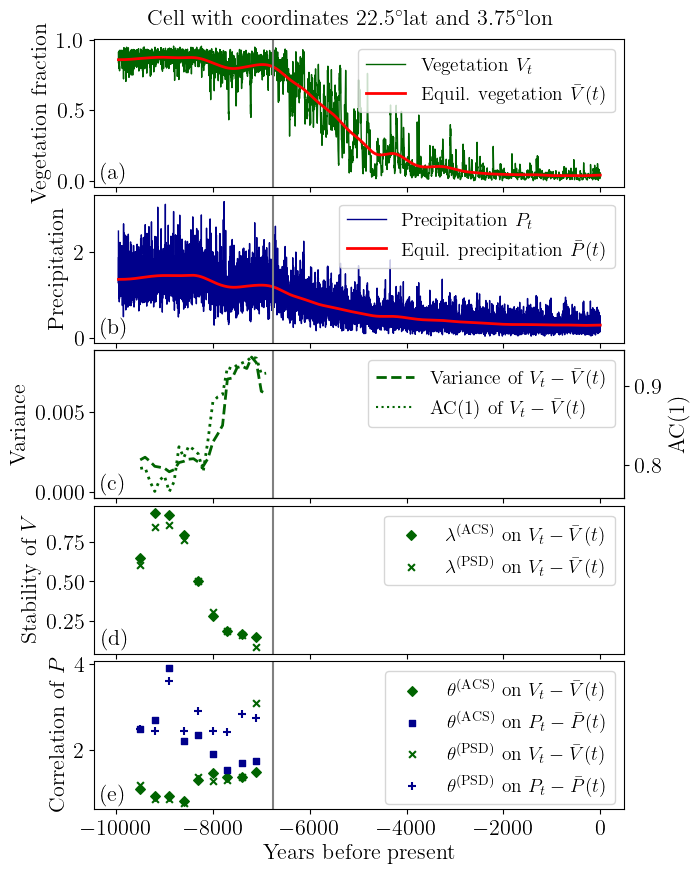

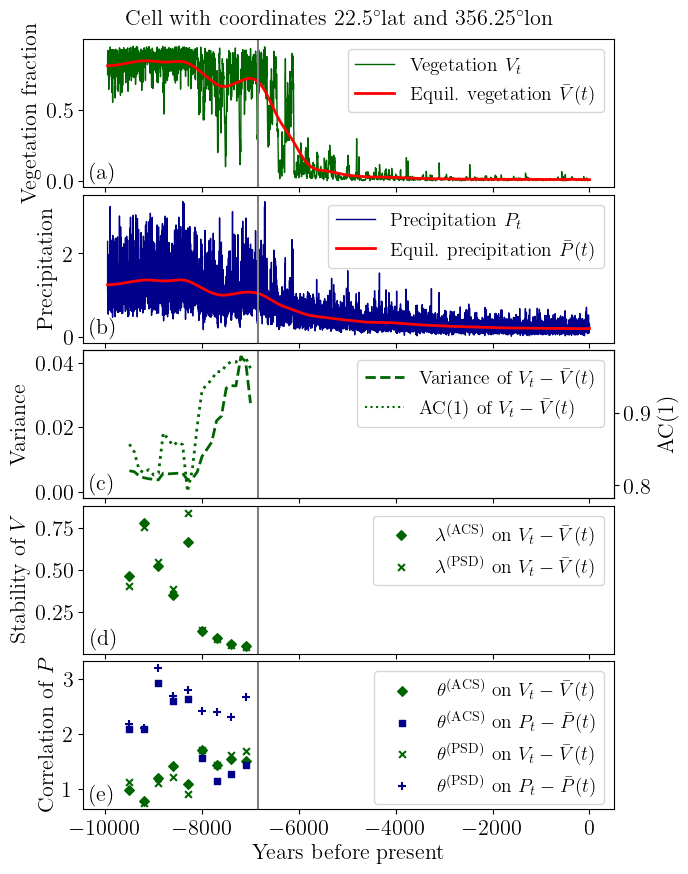

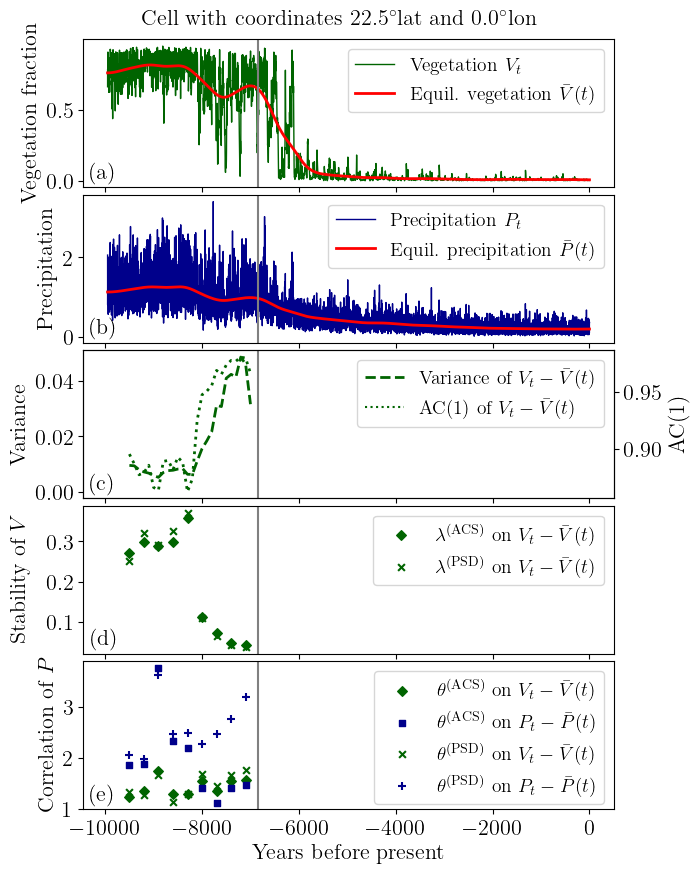

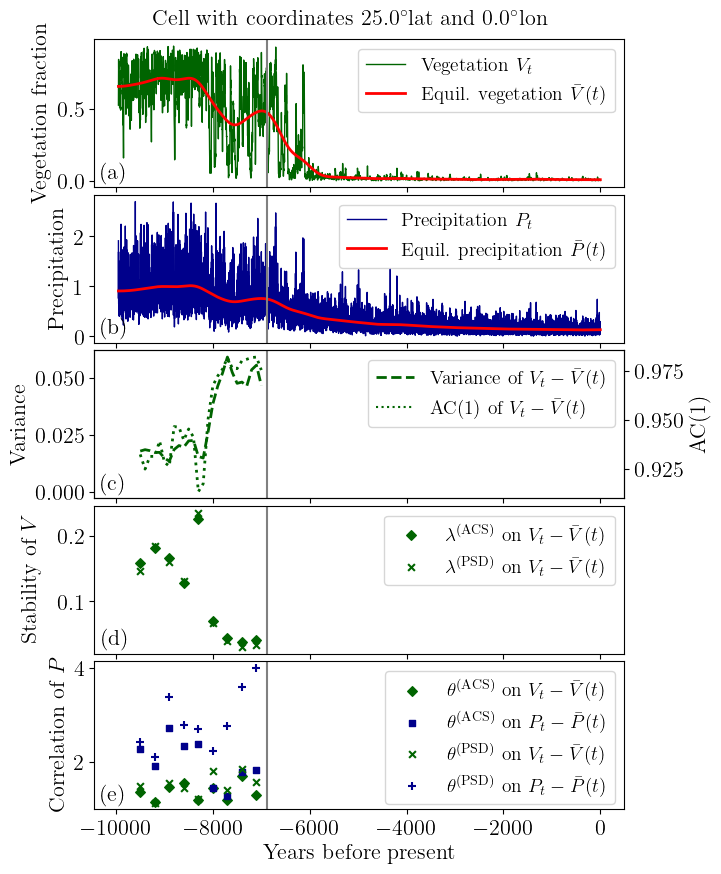

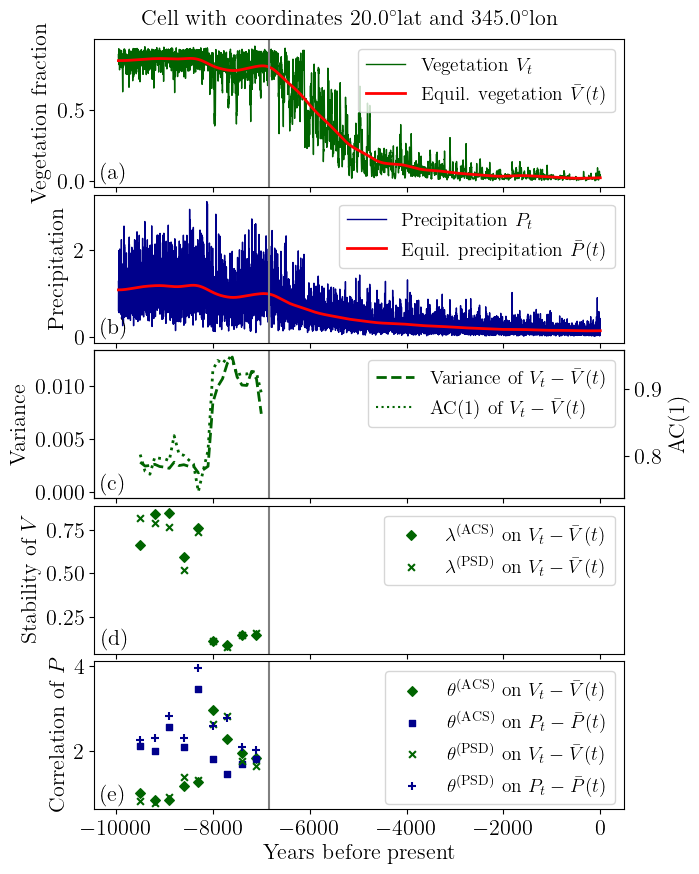

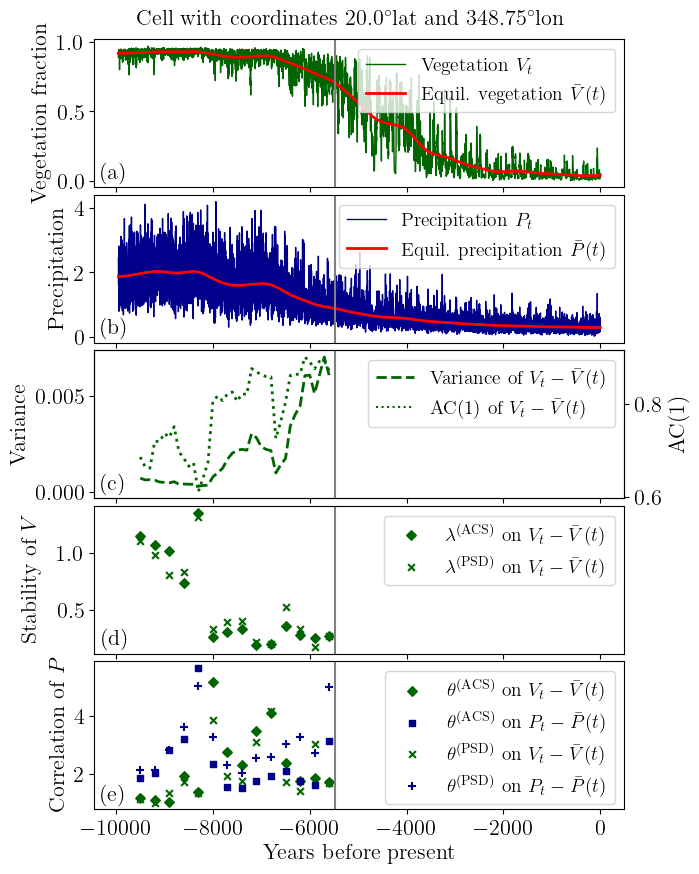

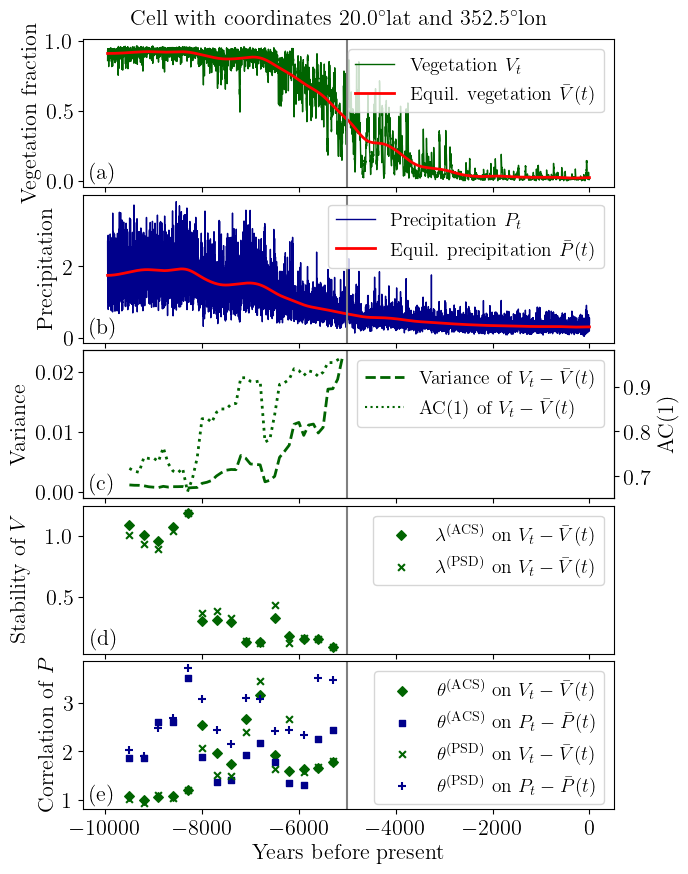

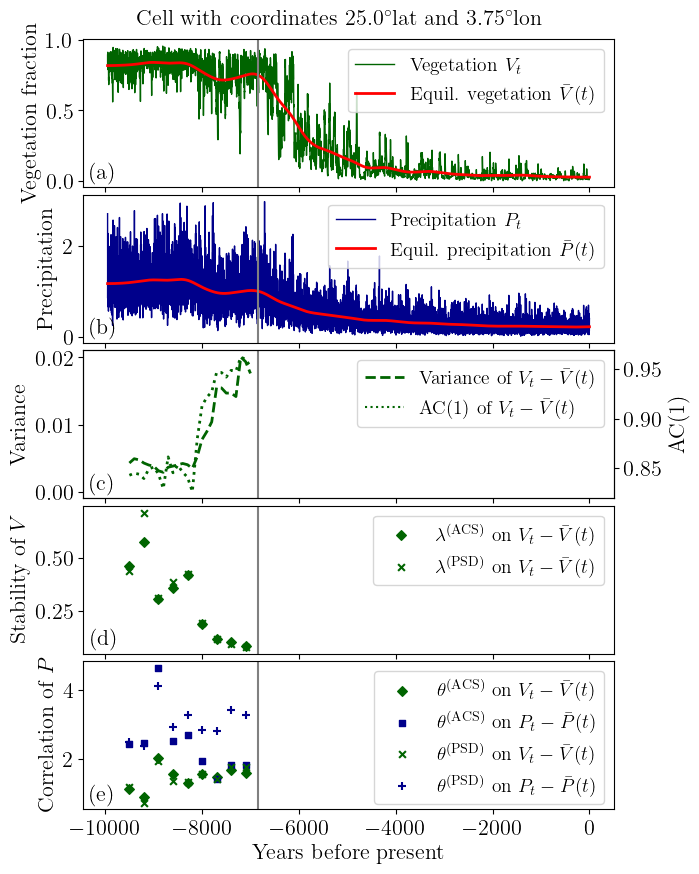

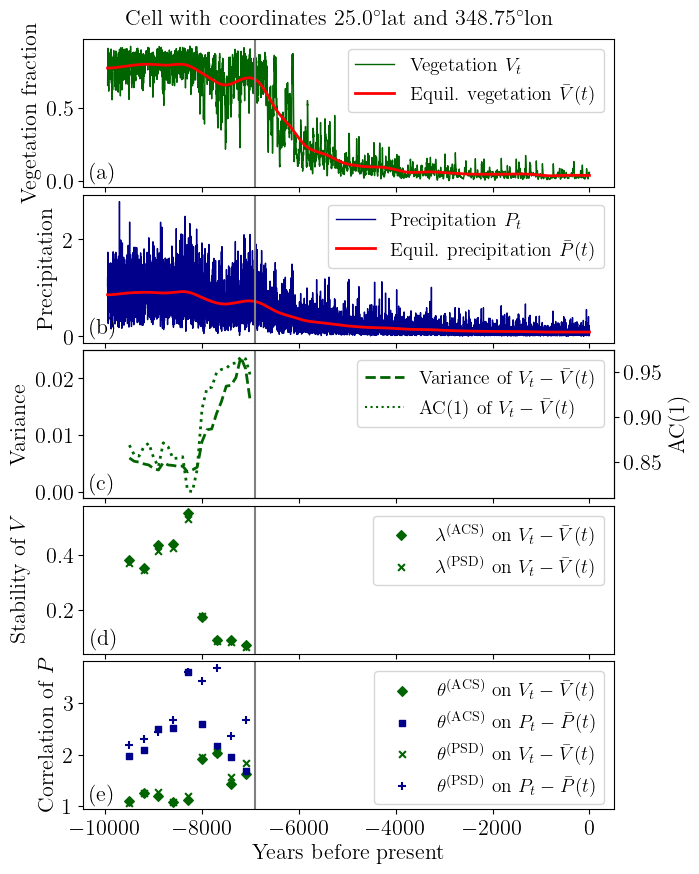

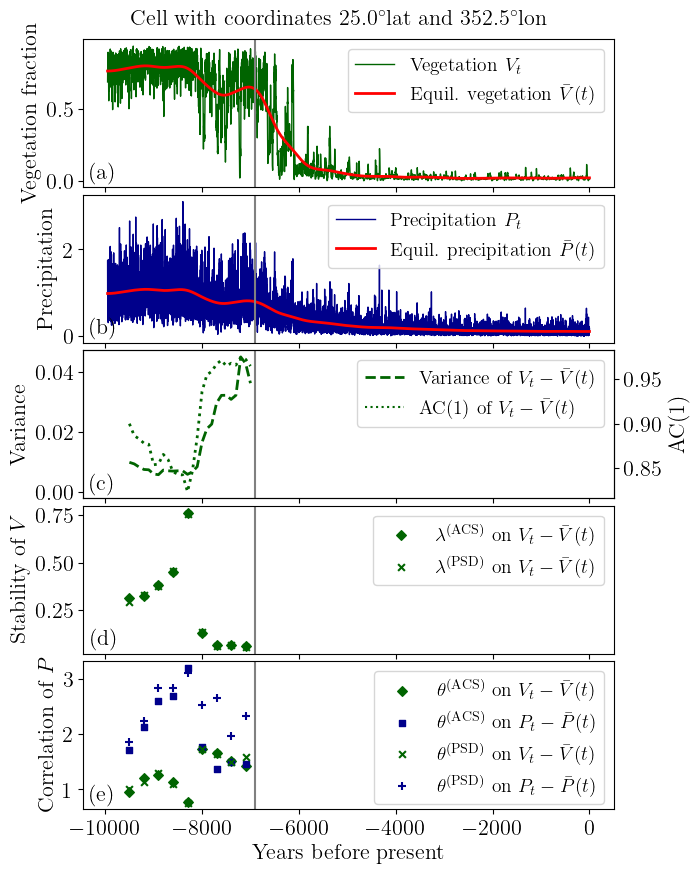

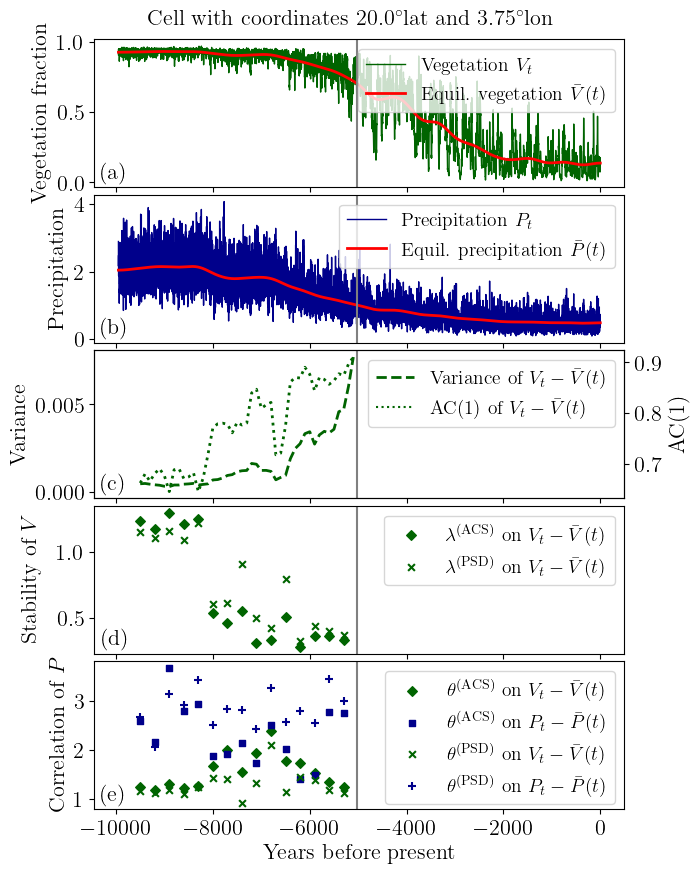

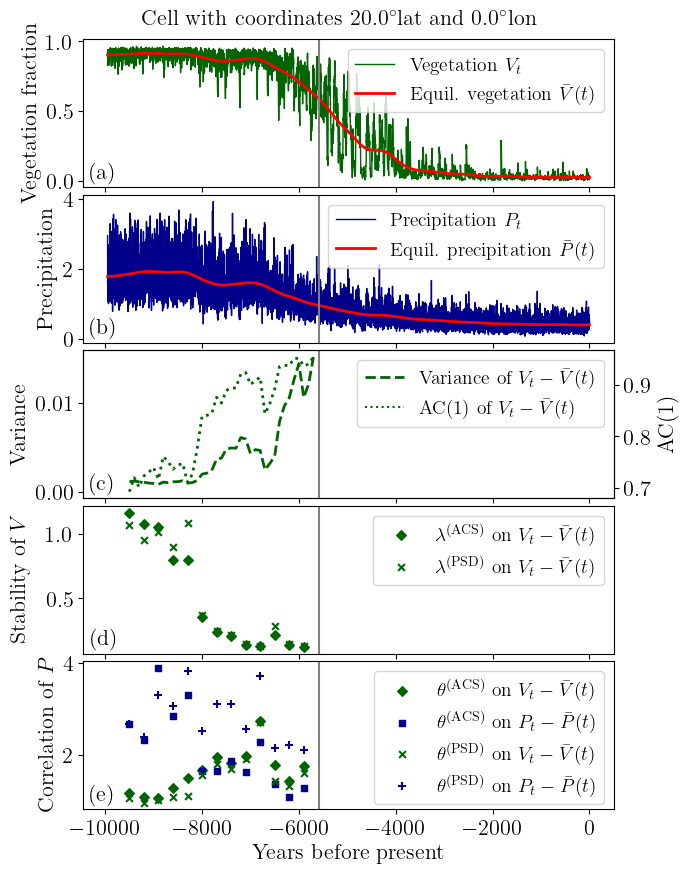

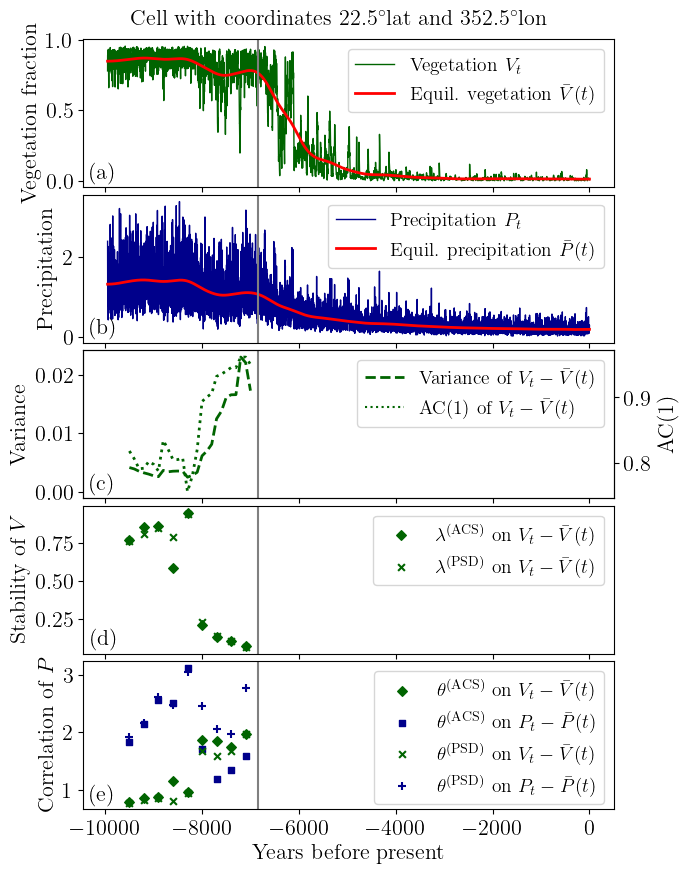

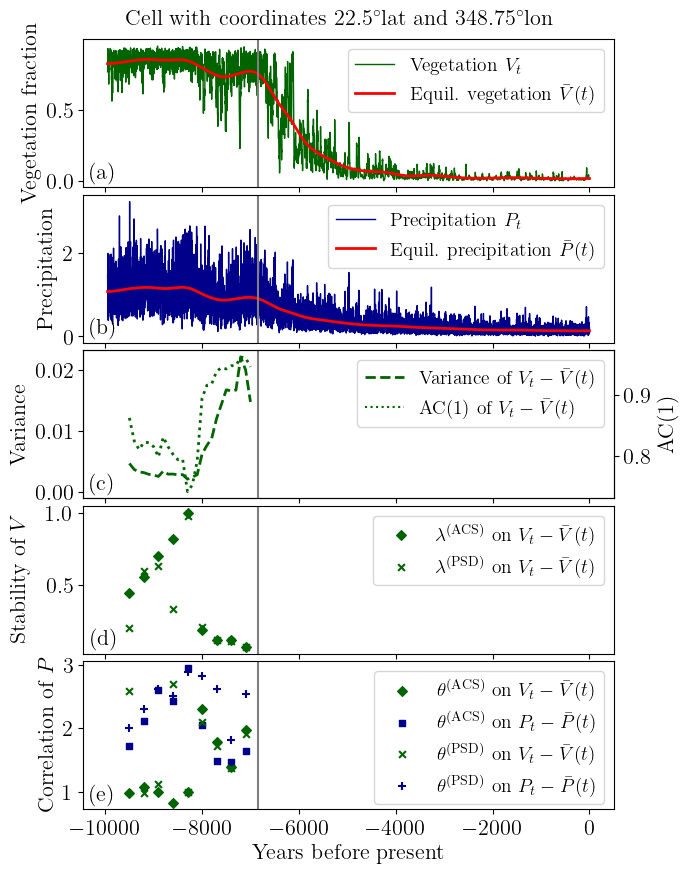

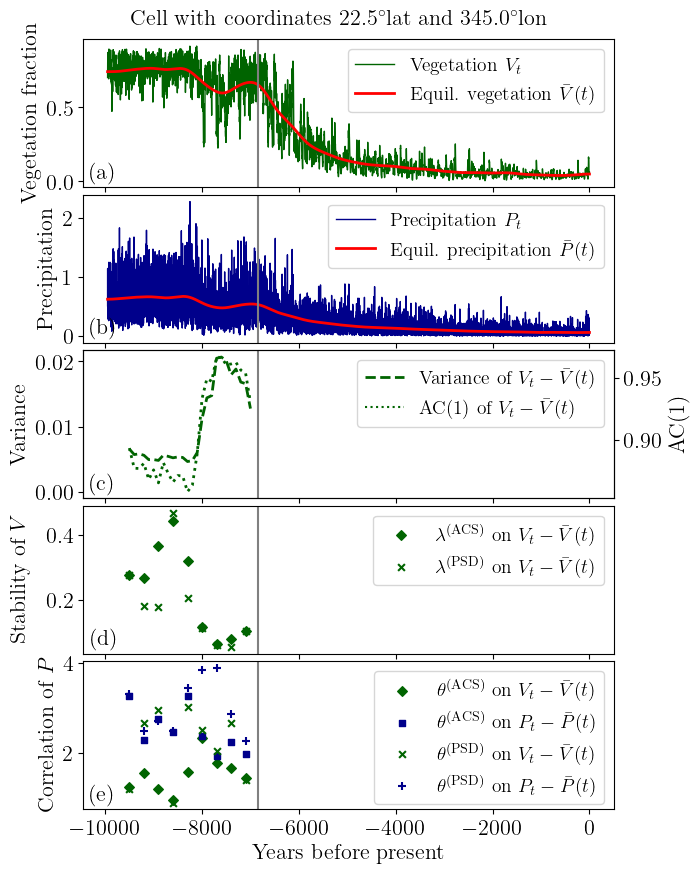

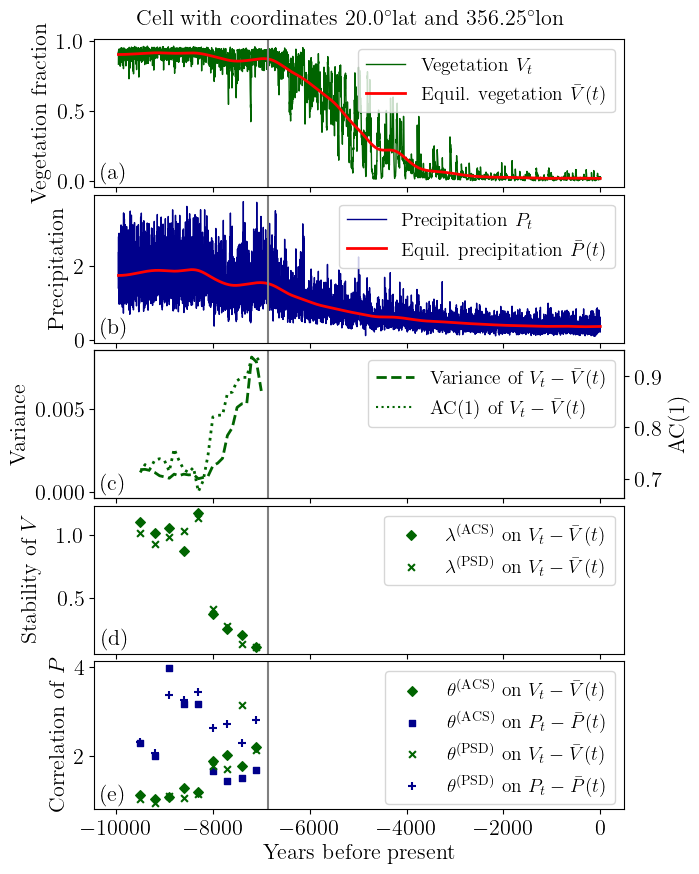

In [73]:
GS_data_analysis.plot_all_cells()